# Author Details:

### **Name: Muhammad Hamid**
### **linkedin** :https://www.linkedin.com/in/muhammad-hamid-87242a312/

# Sales Forecasting with ARIMA and Prophet Models

This notebook demonstrates the process of forecasting sales using two popular time series models: ARIMA and Prophet. The analysis includes data preparation, model fitting, and evaluation of model performance using metrics like MAE and RMSE.


## Importing Required Libraries

We start by importing the necessary Python libraries for data manipulation, visualization, and model building. These include `pandas`, `numpy`, `matplotlib`, and several time series modeling libraries such as `ARIMA`, `SARIMAX`, and `Prophet`.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

c:\Users\Hamid.DESKTOP-JNLE602\anaconda3\envs\Data_Science\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Loading and Previewing the Dataset

The dataset used in this analysis is the `Superstore.csv`, which contains sales data. We will first load the dataset and preview its structure to understand the columns and data types.


In [5]:
df = pd.read_csv('Superstore.csv')


In [6]:
# print few rows of data set
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Data Preprocessing

To analyze time series data, it's essential to ensure that the date columns are correctly formatted. We convert the `Order Date` column to a datetime format and aggregate the sales data by `Order Date`.


In [8]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])


sales_data = df.groupby('Order Date')['Sales'].sum().reset_index()

## Visualizing Sales Over Time

A line plot is used to visualize the sales trends over time. This helps in identifying any patterns, seasonality, or trends present in the data.


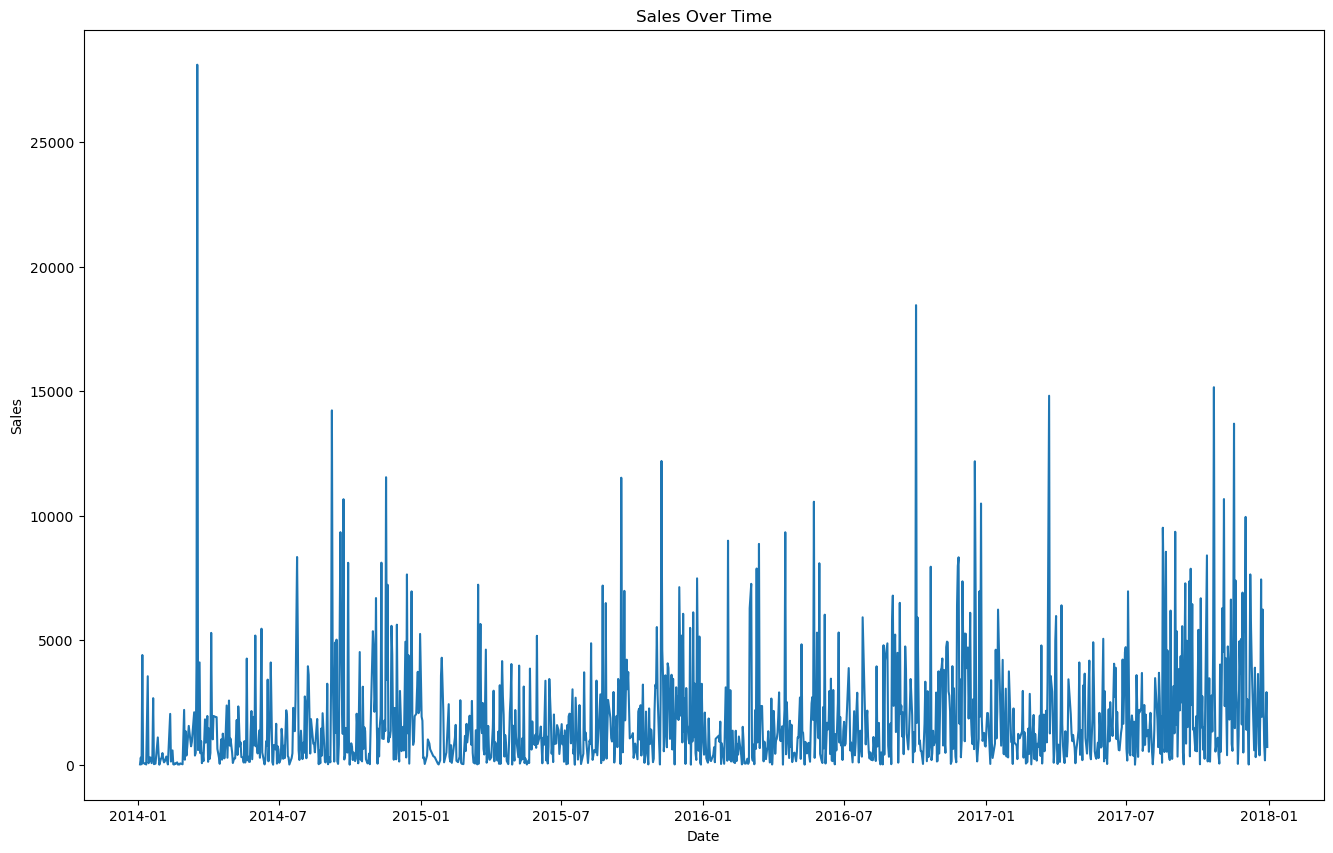

In [9]:
# viz data to understand the sales trend

plt.figure(figsize=(16, 10))
plt.plot(sales_data['Order Date'], sales_data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Checking for Stationarity

Before applying time series models, it's important to check if the data is stationary. We use the Augmented Dickey-Fuller (ADF) test to determine the stationarity of the sales data.


In [10]:
# Check stationarity
result = adfuller(sales_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.839520598260239
p-value: 3.8063303733320534e-07


## Splitting the Data

We split the dataset into training and testing sets. The last 30 days of sales data are reserved for testing the model's performance.


In [11]:
# Split data
train = sales_data[:len(sales_data)-30]
test = sales_data[len(sales_data)-30:]

## Fitting the ARIMA Model

The ARIMA model is fitted on the training data, and the forecast for the next 30 days is generated. The performance of the model is evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [12]:
# Fit ARIMA model
model = SARIMAX(sales_data['Sales'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=30)

In [13]:
# Calculate MAE and RMSE
Amae = mean_absolute_error(test['Sales'], forecast)
Armse = np.sqrt(mean_squared_error(test['Sales'], forecast))



print('ARIMA MAE: ', Amae)
print('ARIMA RMSE: ', Armse)

ARIMA MAE:  1991.066351106379
ARIMA RMSE:  2517.2822569093187


# **Implementing Prophet**

## Fitting the Prophet Model

Prophet, a model developed by Facebook, is used for forecasting time series data. Similar to ARIMA, we fit the model on the training data and generate forecasts for the next 30 days, evaluating the model's performance.


08:55:47 - cmdstanpy - INFO - Chain [1] start processing
08:55:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Hamid.DESKTOP-JNLE602\anaconda3\envs\Data_Science\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Hamid.DESKTOP-JNLE602\anaconda3\envs\Data_Science\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


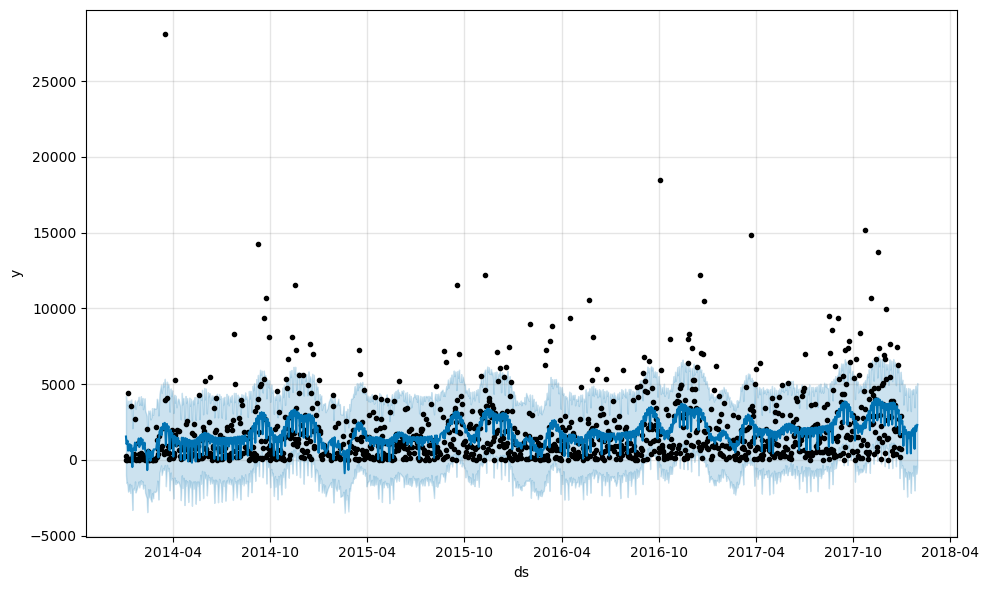

In [14]:
# Prepare data
prophet_data = sales_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Fit the model
model = Prophet()
model.fit(prophet_data)

# Forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

In [15]:
# Fit Prophet model
model = Prophet()
model.fit(train.rename(columns={'Order Date': 'ds', 'Sales': 'y'}))

08:55:48 - cmdstanpy - INFO - Chain [1] start processing
08:55:48 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Calculate MAE and RMSE
mae = mean_absolute_error(test['Sales'], forecast['yhat'][-30:])
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast['yhat'][-30:]))
print('Prophet MAE: ', mae)
print('Prophet RMSE: ', rmse)

Prophet MAE:  2155.782624674657
Prophet RMSE:  2872.2376294808446


## Evaluating and Comparing Model Performance

The performance of the ARIMA and Prophet models is compared using MAE and RMSE. This section summarizes the results and provides insights into which model performed better for this dataset.


In [17]:
print('ARIMA MAE: ', Amae)
print('ARIMA RMSE: ', Armse)
print('Prophet MAE: ', mae)
print('Prophet RMSE: ', rmse)

ARIMA MAE:  1991.066351106379
ARIMA RMSE:  2517.2822569093187
Prophet MAE:  2155.782624674657
Prophet RMSE:  2872.2376294808446
